In [1]:
# Linking Google drive to use preprocessed data 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import libraries
import pandas as pd
import numpy as np
import sys
import sklearn
import io
import random
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [3]:
from IPython.display import Image
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.pipeline import Pipeline

In [4]:
## add the columns' name and read the KDDTrain+ and KDDTest+ datasets
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

print(col_names)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label']


In [5]:
#Training set
df = pd.read_csv("/content/drive/My Drive/CNN-Resnet-IDS/nsl-kdd/NSL_KDD_Train.csv",header=None, names = col_names)
# Testing set
df_test_21 = pd.read_csv("/content/drive/My Drive/CNN-Resnet-IDS/nsl-kdd/NSL_KDD_Test_21.csv", header=None, names = col_names)

print('Dimensions of the Training set:',df.shape)
print('Dimensions of the Test_21 set:',df_test_21.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test_21 set: (11850, 42)


In [6]:
# review the features type
df.head(5) 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [7]:
df_test_21.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,13,tcp,telnet,SF,118,2425,0,0,0,0,...,10,0.38,0.12,0.04,0.0,0.00,0.00,0.12,0.3,guess_passwd
1,0,udp,private,SF,44,0,0,0,0,0,...,254,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,snmpguess
2,0,tcp,telnet,S3,0,44,0,0,0,0,...,79,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,processtable
3,0,udp,private,SF,53,55,0,0,0,0,...,255,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,normal
4,0,tcp,private,SH,0,0,0,0,0,0,...,1,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,nmap


In [8]:
print("Training dim: ",df.shape)
print("Testing dim: ",df_test_21.shape)

Training dim:  (125973, 42)
Testing dim:  (11850, 42)


In [9]:
print('Label distribution in the Training set:')
print("****************************************")
print(df['label'].value_counts())
print('\n')
print('Label distribution in the Test set:')
print("**************************************")
print(df_test_21['label'].value_counts())

Label distribution in the Training set:
****************************************
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64


Label distribution in the Test set:
**************************************
normal             2152
neptune            1579
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               727
processtable        685
smurf               627
back                359
s

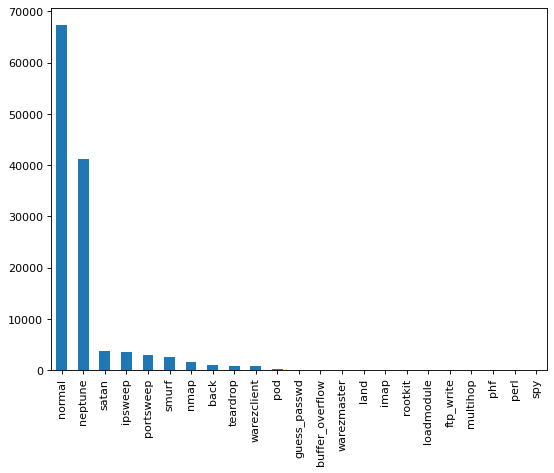

In [10]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

df['label'].value_counts().plot(kind='bar')

In [11]:
# columns are categorical, not yet binary: protocol_type (column 2), service (column 3), flag (column 4).
print('Training set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print()
print('Distribution of categories in service:')
print(df['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories

Distribution of categories in service:
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: service, dtype: int64


In [12]:
# Test set
print('Test set:')
for col_name in df_test_21.columns:
    if df_test_21[col_name].dtypes == 'object' :
        unique_cat = len(df_test_21[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 62 categories
Feature 'flag' has 11 categories
Feature 'label' has 38 categories


In [13]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag']

df_categorical_values = df[categorical_columns]
# for Test
testdf_categorical_values = df_test_21[categorical_columns]

In [14]:
# protocol type
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
print(unique_protocol2)

# service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
print(unique_service2)


# flag
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
print(unique_flag2)


# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2


#do it for test set
unique_service_test=sorted(df_test_21.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp']
['service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'ser

In [15]:
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values.head())
print('--------------------')
print(df_categorical_values_enc.head())
# test set
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)

  protocol_type   service flag
0           tcp  ftp_data   SF
1           udp     other   SF
2           tcp   private   S0
3           tcp      http   SF
4           tcp      http   SF
--------------------
   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


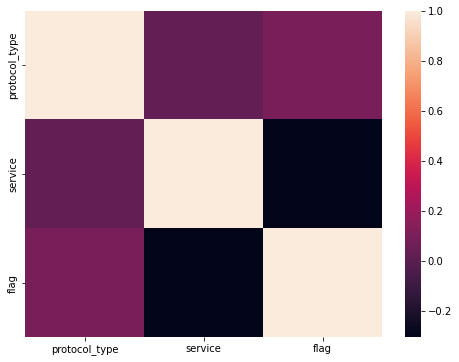

In [16]:
corr = df_categorical_values_enc.corr()
plt.figure(figsize=(8,6))
sb.heatmap(corr)
plt.show()

In [17]:
enc = OneHotEncoder(categories='auto')
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)
# test set
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=testdumcols)

In [18]:
trainservice=df['service'].tolist()
testservice= df_test_21['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]

for col in difference:
    testdf_cat_data[col] = 0

print(df_cat_data.shape)    
print(testdf_cat_data.shape)

(125973, 84)
(11850, 84)


In [19]:
newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)

# test data
newdf_test=df_test_21.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)

print(newdf.shape)
print(newdf_test.shape)

(125973, 123)
(11850, 123)


In [20]:
# step1: apply the logarithmic scaling method for scaling to obtain the ranges of `duration[0,4.77]', `src_bytes[0,9.11]' and `dst_bytes[0,9.11]
newdf['log2_value1'] = np.log2(newdf['duration'])
newdf['log2_value2'] = np.log(newdf['src_bytes'])
newdf['log2_value3'] = np.log(newdf['dst_bytes'])
newdf=newdf.drop(['log2_value3','log2_value2','log2_value1'], axis=1)


# testing set

newdf_test['log2_value1'] = np.log2(newdf_test['duration'])
newdf_test['log2_value2'] = np.log(newdf_test['src_bytes'])
newdf_test['log2_value3'] = np.log(newdf_test['dst_bytes'])
newdf_test=newdf_test.drop(['log2_value3','log2_value2','log2_value1'], axis=1)

print(newdf)
print(newdf_test)

        duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0              0        491          0     0               0       0    0   
1              0        146          0     0               0       0    0   
2              0          0          0     0               0       0    0   
3              0        232       8153     0               0       0    0   
4              0        199        420     0               0       0    0   
...          ...        ...        ...   ...             ...     ...  ...   
125968         0          0          0     0               0       0    0   
125969         8        105        145     0               0       0    0   
125970         0       2231        384     0               0       0    0   
125971         0          0          0     0               0       0    0   
125972         0        151          0     0               0       0    0   

        num_failed_logins  logged_in  num_compromised  ...  flag_REJ  \
0  

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
labeldf=newdf['label']
labeldf_test=newdf_test['label']


# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                            'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})



#put the new label column back
newdf['label'] = newlabeldf
newdf_test['label'] = newlabeldf_test

In [22]:
newdf.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
newdf_test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_SF,flag_SH,service_printer,service_http_2784,service_rje,service_aol,service_urh_i,service_http_8001,service_red_i,service_harvest
0,13,118,2425,0,0,0,0,0,1,0,...,1.0,0.0,0,0,0,0,0,0,0,0
1,0,44,0,0,0,0,0,0,0,0,...,1.0,0.0,0,0,0,0,0,0,0,0
2,0,0,44,0,0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,0,53,55,0,0,0,0,0,0,0,...,1.0,0.0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0,0,0,0,0,0,0,0


In [24]:
#Split the test and train data into training and testing 
# train set:
x=newdf.drop(["label"],1)  # features
y=newlabeldf  # label
# test set:
xtest=newdf_test.drop(['label'],1) # features
ytest=newlabeldf_test # label

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [25]:
print("X: ",x.shape)
print("Y: ",y.shape)

X:  (125973, 122)
Y:  (125973,)


In [26]:
print("X: ",xtest.shape)
print("Y: ",ytest.shape)

X:  (11850, 122)
Y:  (11850,)


In [27]:
# scaling
scale = MinMaxScaler()
scale = preprocessing.StandardScaler().fit(x)
X_train_scaled=scale.transform(x)
print(X_train_scaled)

[[-0.11024922 -0.0076786  -0.00491864 ... -0.01972622  0.82515007
  -0.04643159]
 [-0.11024922 -0.00773737 -0.00491864 ... -0.01972622  0.82515007
  -0.04643159]
 [-0.11024922 -0.00776224 -0.00491864 ... -0.01972622 -1.21190076
  -0.04643159]
 ...
 [-0.11024922 -0.00738219 -0.00482315 ... -0.01972622  0.82515007
  -0.04643159]
 [-0.11024922 -0.00776224 -0.00491864 ... -0.01972622 -1.21190076
  -0.04643159]
 [-0.11024922 -0.00773652 -0.00491864 ... -0.01972622  0.82515007
  -0.04643159]]


In [28]:
# scaling
scale = MinMaxScaler()
scale = preprocessing.StandardScaler().fit(xtest)
X_test_scaled=scale.transform(xtest)
print(X_test_scaled)

[[-0.2096739  -0.02966205  0.05008971 ...  0.          0.
   0.        ]
 [-0.21644699 -0.02977555 -0.05139586 ...  0.          0.
   0.        ]
 [-0.21644699 -0.02984304 -0.04955447 ...  0.          0.
   0.        ]
 ...
 [-0.21592598 -0.02984304 -0.05076811 ...  0.          0.
   0.        ]
 [-0.21644699 -0.02984304 -0.05139586 ...  0.          0.
   0.        ]
 [-0.21644699 -0.02978016 -0.05139586 ...  0.          0.
   0.        ]]


In [29]:
from tensorflow import keras
import numpy as np
import datetime
import time

sample = X_train_scaled.shape[0]
features = X_train_scaled.shape[1]
#Train: convert 2D to 3D for input
x_train = np.reshape(X_train_scaled,(sample,features,1)) #shape  = (125973, 18, 1)
#Test: convert 2D to 3D for input

x_test = np.reshape(X_test_scaled,(X_test_scaled.shape[0],X_test_scaled.shape[1],1))

In [30]:
print(x_train.shape)
print(y.shape)

(125973, 122, 1)
(125973,)


In [31]:
print(x_test.shape)
print(ytest.shape)

(11850, 122, 1)
(11850,)


In [32]:
#@title
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Activation, Dense, Flatten, Conv2D, MaxPooling2D, 
    GlobalAveragePooling2D, AveragePooling2D, BatchNormalization, add)
import tensorflow.keras.regularizers as regulizers

#==============================================================================
# Function Definitions
#==============================================================================

def _res_conv(filters, kernel_size=3, padding='same', strides=1, use_relu=True, use_bias=False, name='cbr',
              kernel_initializer='he_normal', kernel_regularizer=regulizers.l2(1e-4)):
    """
    Return a layer block chaining conv, batchnrom and reLU activation.
    :param filters:                 Number of filters.
    :param kernel_size:             Kernel size.
    :param padding:                 Convolution padding.
    :param strides:                 Convolution strides.
    :param use_relu:                Flag to apply ReLu activation at the end.
    :param use_bias:                Flag to use bias or not in Conv layer.
    :param name:                    Name suffix for the layers.
    :param kernel_initializer:      Kernel initialisation method name.
    :param kernel_regularizer:      Kernel regularizer.
    :return:                        Callable layer block
    """

    def layer_fn(x):
        conv = Conv2D(
            filters=filters, kernel_size=kernel_size, padding=padding, strides=strides, use_bias=use_bias,
            kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer, 
            name=name + '_c')(x)
        res = BatchNormalization(axis=-1, name=name + '_bn')(conv)
        if use_relu:
            res = Activation("relu", name=name + '_r')(res)
        return res

    return layer_fn


def _merge_with_shortcut(kernel_initializer='he_normal', kernel_regularizer=regulizers.l2(1e-4), 
                         name='block'):
    """
    Return a layer block which merge an input tensor and the corresponding 
    residual output tensor from another branch.
    :param kernel_initializer:      Kernel initialisation method name.
    :param kernel_regularizer:      Kernel regularizer.
    :param name:                    Name suffix for the layers.
    :return:                        Callable layer block
    """

    def layer_fn(x, x_residual):
        # We check if `x_residual` was scaled down. If so, we scale `x` accordingly with a 1x1 conv:
        x_shape = tf.keras.backend.int_shape(x)
        x_residual_shape = tf.keras.backend.int_shape(x_residual)
        if x_shape == x_residual_shape:
            shortcut = x
        else:
            strides = (
                int(round(x_shape[1] / x_residual_shape[1])), # vertical stride
                int(round(x_shape[2] / x_residual_shape[2]))  # horizontal stride
            )
            x_residual_channels = x_residual_shape[3]
            shortcut = Conv2D(
                filters=x_residual_channels, kernel_size=(1, 1), padding="valid", strides=strides,
                kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer,
                name=name + '_shortcut_c')(x)

        merge = add([shortcut, x_residual])
        return merge

    return layer_fn


def _residual_block_basic(filters, kernel_size=3, strides=1, use_bias=False, name='res_basic',
                          kernel_initializer='he_normal', kernel_regularizer=regulizers.l2(1e-4)):
    """
    Return a basic residual layer block.
    :param filters:                 Number of filters.
    :param kernel_size:             Kernel size.
    :param strides:                 Convolution strides
    :param use_bias:                Flag to use bias or not in Conv layer.
    :param kernel_initializer:      Kernel initialisation method name.
    :param kernel_regularizer:      Kernel regularizer.
    :return:                        Callable layer block
    """

    def layer_fn(x):
        x_conv1 = _res_conv(
            filters=filters, kernel_size=kernel_size, padding='same', strides=strides, 
            use_relu=True, use_bias=use_bias,
            kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer,
            name=name + '_cbr_1')(x)
        x_residual = _res_conv(
            filters=filters, kernel_size=kernel_size, padding='same', strides=1, 
            use_relu=False, use_bias=use_bias,
            kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer,
            name=name + '_cbr_2')(x_conv1)
        merge = _merge_with_shortcut(kernel_initializer, kernel_regularizer,name=name)(x, x_residual)
        merge = Activation('relu')(merge)
        return merge

    return layer_fn


def _residual_block_bottleneck(filters, kernel_size=3, strides=1, use_bias=False, name='res_bottleneck',
                               kernel_initializer='he_normal', kernel_regularizer=regulizers.l2(1e-4)):
    """
    Return a residual layer block with bottleneck, recommended for deep ResNets (depth > 34).
    :param filters:                 Number of filters.
    :param kernel_size:             Kernel size.
    :param strides:                 Convolution strides
    :param use_bias:                Flag to use bias or not in Conv layer.
    :param kernel_initializer:      Kernel initialisation method name.
    :param kernel_regularizer:      Kernel regularizer.
    :return:                        Callable layer block
    """

    def layer_fn(x):
        x_bottleneck = _res_conv(
            filters=filters, kernel_size=1, padding='valid', strides=strides, 
            use_relu=True, use_bias=use_bias,
            kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer,
            name=name + '_cbr1')(x)
        x_conv = _res_conv(
            filters=filters, kernel_size=kernel_size, padding='same', strides=1, 
            use_relu=True, use_bias=use_bias,
            kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer,
            name=name + '_cbr2')(x_bottleneck)
        x_residual = _res_conv(
            filters=filters * 4, kernel_size=1, padding='valid', strides=1, 
            use_relu=False, use_bias=use_bias,
            kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer,
            name=name + '_cbr3')(x_conv)
        merge = _merge_with_shortcut(kernel_initializer, kernel_regularizer, name=name)(x, x_residual)
        merge = Activation('relu')(merge)
        return merge

    return layer_fn


def _residual_macroblock(block_fn, filters, repetitions=3, kernel_size=3, strides_1st_block=1, use_bias=False,
                         kernel_initializer='he_normal', kernel_regularizer=regulizers.l2(1e-4),
                         name='res_macroblock'):
    """
    Return a layer block, composed of a repetition of `N` residual blocks.
    :param block_fn:                Block layer method to be used.
    :param repetitions:             Number of times the block should be repeated inside.
    :param filters:                 Number of filters.
    :param kernel_size:             Kernel size.
    :param strides_1st_block:       Convolution strides for the 1st block.
    :param use_bias:                Flag to use bias or not in Conv layer.
    :param kernel_initializer:      Kernel initialisation method name.
    :param kernel_regularizer:      Kernel regularizer.
    :return:                        Callable layer block
    """

    def layer_fn(x):
        for i in range(repetitions):
            block_name = "{}_{}".format(name, i) 
            strides = strides_1st_block if i == 0 else 1
            x = block_fn(filters=filters, kernel_size=kernel_size, 
                         strides=strides, use_bias=use_bias,
                         kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer,
                         name=block_name)(x)
        return x

    return layer_fn


def ResNet(input_shape, num_classes=1000, block_fn=_residual_block_basic, repetitions=(2, 2, 2, 2),
           use_bias=False, kernel_initializer='he_normal', kernel_regularizer=regulizers.l2(1e-4)):
    """
    Build a ResNet model for classification.
    :param input_shape:             Input shape (e.g. (224, 224, 3))
    :param num_classes:             Number of classes to predict
    :param block_fn:                Block layer method to be used.
    :param repetitions:             List of repetitions for each macro-blocks the network should contain.
    :param use_bias:                Flag to use bias or not in Conv layer.
    :param kernel_initializer:      Kernel initialisation method name.
    :param kernel_regularizer:      Kernel regularizer.
    :return:                        ResNet model.
    """

    # Input and 1st layers:
    inputs = Input(shape=input_shape)
    conv = _res_conv(
        filters=64, kernel_size=7, strides=2, use_relu=True, use_bias=use_bias,
        kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer)(inputs)
    maxpool = MaxPooling2D(pool_size=3, strides=2, padding='same')(conv)

    # Chain of residual blocks:
    filters = 64
    strides = 2
    res_block = maxpool
    for i, repet in enumerate(repetitions):
        # We do not further reduce the input size for the 1st block (max-pool applied just before):
        block_strides = strides if i != 0 else 1
        macroblock_name = "block_{}".format(i) 
        res_block = _residual_macroblock(
            block_fn=block_fn, repetitions=repet, name=macroblock_name,
            filters=filters, strides_1st_block=block_strides, use_bias=use_bias,
            kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer)(res_block)
        filters = min(filters * 2, 1024) # we limit to 1024 filters max

    # Final layers for prediction:
    res_spatial_dim = tf.keras.backend.int_shape(res_block)[1:3]
    avg_pool = AveragePooling2D(pool_size=res_spatial_dim, strides=1)(res_block)
    flatten = Flatten()(avg_pool)
    predictions = Dense(units=num_classes, kernel_initializer=kernel_initializer, 
                        activation='softmax')(flatten)

    # Model:
    model = Model(inputs=inputs, outputs=predictions)
    return model


def ResNet18(input_shape, num_classes=1000, use_bias=True,
             kernel_initializer='he_normal', kernel_regularizer=None):
    return ResNet(input_shape, num_classes, block_fn=_residual_block_basic, repetitions=(2, 2, 2, 2),
                  use_bias=use_bias, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer)


In [33]:
import math

# Some hyper-parameters:
input_shape = [224, 224, 3] # We will resize the input images to this shape
batch_size  = 32            # Images per batch (reduce/increase according to the machine's capability)
num_epochs  = 300           # Max number of training epochs
# Number of classes:

# Train/val Datasets:
train_dataset = x_train
val_dataset = x_test

num_classes = features
# Number of images:
num_train_imgs = x_train.shape[0]
num_val_imgs = x_test.shape[0]

train_steps_per_epoch = math.ceil(num_train_imgs / batch_size)
val_steps_per_epoch   = math.ceil(num_val_imgs / batch_size)

In [34]:
# train_dataset = train_dataset.repeat(num_epochs).shuffle(10000)

In [35]:
def _prepare_data_fn(features, input_shape, augment=False):
    """
    Resize image to expected dimensions, and opt. apply some random transformations.
    :param features:    Data
    :param input_shape: Shape expected by the models (images will be resized accordingly)
    :param augment:     Flag to apply some random augmentations to the images
    :return:            Augmented Images, Labels
    """
    input_shape = tf.convert_to_tensor(input_shape)
    
    image = features['image']
    label = features['label']
    # Convert the images to float type, also scaling their values from [0, 255] to [0., 1.]:
    image = tf.image.convert_image_dtype(image, tf.float32)
    
    if augment:
        # Randomly applied horizontal flip:
        image = tf.image.random_flip_left_right(image)

        # Random B/S changes:
        image = tf.image.random_brightness(image, max_delta=0.1)
        image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
        image = tf.clip_by_value(image, 0.0, 1.0) # keeping pixel values in check

        # Random resize and random crop back to expected size:
        
        random_scale_factor = tf.random.uniform([1], minval=1., maxval=1.4, dtype=tf.float32)
        scaled_height = tf.cast(tf.cast(input_shape[0], tf.float32) * random_scale_factor, 
                                tf.int32)
        scaled_width = tf.cast(tf.cast(input_shape[1], tf.float32) * random_scale_factor, 
                               tf.int32)
        scaled_shape = tf.squeeze(tf.stack([scaled_height, scaled_width]))
        image = tf.image.resize(image, scaled_shape)
        image = tf.image.random_crop(image, input_shape)
    else:
        image = tf.image.resize(image, input_shape[:2])
        
    return image, label

In [38]:
#@title
import functools

prepare_data_fn_for_train = functools.partial(_prepare_data_fn, 
                                              input_shape=input_shape,
                                              augment=True)

x_train = x_train.map(prepare_data_fn_for_train, num_parallel_calls=4)

# We also ask the dataset to batch the samples:
x_train = x_train.batch(batch_size)

x_train = x_train.prefetch(1) 

AttributeError: ignored

In [37]:
prepare_data_fn_for_val = functools.partial(_prepare_data_fn, 
                                              input_shape=input_shape,
                                              augment=False)

x_test  =             (x_test
                     .repeat()
                     .map(prepare_data_fn_for_val, num_parallel_calls=4)
                     .batch(batch_size)
                     .prefetch(1))

TypeError: ignored

In [40]:
train_steps_per_epoch = math.ceil(num_train_imgs / batch_size)
val_steps_per_epoch   = math.ceil(num_val_imgs / batch_size)

In [39]:
#@title
# Setting some variables to format the logs:
log_begin_red, log_begin_blue, log_begin_green = '\033[91m', '\033[94m', '\033[92m'
log_begin_bold, log_begin_underline = '\033[1m', '\033[4m'
log_end_format = '\033[0m'

class SimpleLogCallback(tf.keras.callbacks.Callback):
    """ Keras callback for simple, denser console logs."""

    def __init__(self, metrics_dict, num_epochs='?', log_frequency=1,
                 metric_string_template='\033[1m[[name]]\033[0m = \033[94m{[[value]]:5.3f}\033[0m'):
        """
        Initialize the Callback.
        :param metrics_dict:            Dictionary containing mappings for metrics names/keys
                                        e.g. {"accuracy": "acc", "val. accuracy": "val_acc"}
        :param num_epochs:              Number of training epochs
        :param log_frequency:           Log frequency (in epochs)
        :param metric_string_template:  (opt.) String template to print each metric
        """
        super().__init__()

        self.metrics_dict = collections.OrderedDict(metrics_dict)
        self.num_epochs = num_epochs
        self.log_frequency = log_frequency

        # We build a format string to later print the metrics, (e.g. "Epoch 0/9: loss = 1.00; val-loss = 2.00")
        log_string_template = 'Epoch {0:2}/{1}: '
        separator = '; '

        i = 2
        for metric_name in self.metrics_dict:
            templ = metric_string_template.replace('[[name]]', metric_name).replace('[[value]]', str(i))
            log_string_template += templ + separator
            i += 1

        # We remove the "; " after the last element:
        log_string_template = log_string_template[:-len(separator)]
        self.log_string_template = log_string_template

    def on_train_begin(self, logs=None):
        print("Training: {}start{}".format(log_begin_red, log_end_format))

    def on_train_end(self, logs=None):
        print("Training: {}end{}".format(log_begin_green, log_end_format))

    def on_epoch_end(self, epoch, logs={}):
        if (epoch - 1) % self.log_frequency == 0 or epoch == self.num_epochs:
            values = [logs[self.metrics_dict[metric_name]] for metric_name in self.metrics_dict]
            print(self.log_string_template.format(epoch, self.num_epochs, *values))

In [41]:
import tensorflow as tf
import os
# Choosing which GPU this notebook can access
# (useful when running multiple experiments in parallel, on different GPUs):
os.environ["CUDA_VISIBLE_DEVICES"]= "2" 

In [42]:
import collections

# Callback to simply log metrics at the end of each epoch (saving space compared to verbose=1):
metrics_to_print = collections.OrderedDict([("loss", "loss"), 
                                            ("v-loss", "val_loss"),
                                            ("acc", "acc"), 
                                            ("v-acc", "val_acc"),
                                            ("top5-acc", "top5_acc"), 
                                            ("v-top5-acc", "val_top5_acc")])

callback_simple_log = SimpleLogCallback(metrics_to_print, 
                                        num_epochs=num_epochs, log_frequency=2)

In [43]:
model_dir = '/content/drive/My Drive/CNN-Resnet-IDS/models/resnet_from_scratch'
callbacks = [
    # Callback to interrupt the training if the validation loss/metrics stops improving for some epochs:
    tf.keras.callbacks.EarlyStopping(patience=8, monitor='val_acc',
                                     restore_best_weights=True),
    # Callback to log the graph, losses and metrics into TensorBoard:
    tf.keras.callbacks.TensorBoard(log_dir=model_dir, histogram_freq=0, write_graph=True),
    # Callback to save the model (e.g., every 5 epochs), specifying the epoch and val-loss in the filename:
    tf.keras.callbacks.ModelCheckpoint(
        os.path.join(model_dir, 'weights-epoch{epoch:02d}-loss{val_loss:.2f}.h5'), period=5),
    # Log callback:
    callback_simple_log 
]

In [ ]:
model = ResNet18(input_shape=input_shape, num_classes=num_classes)
optimizer = tf.keras.optimizers.Adam()

accuracy_metric = tf.metrics.SparseCategoricalAccuracy(name='acc')
top5_accuracy_metric = tf.metrics.SparseTopKCategoricalAccuracy(k=5, name='top5_acc')
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', 
                 metrics=[accuracy_metric, top5_accuracy_metric])
model.summary()
history = model.fit(x_train,  
                       epochs=num_epochs, steps_per_epoch=train_steps_per_epoch,
                       validation_data=(x_test), validation_steps=val_steps_per_epoch,
                       verbose=0, callbacks=callbacks)